<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

To demonstrate, we're going to build on the data we processed in `data` 

In [ ]:
image = np.loadtxt('example.txt')
profiles = np.loadtxt('example_profiles.txt')

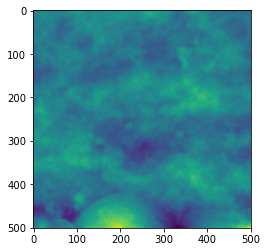

In [ ]:
plt.imshow(image)
plt.show()

In [1]:
#|output: asis
#| echo: false
show_doc(Ra)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L16){target="_blank" style="float:right; font-size:smaller"}

### Ra

>      Ra (im, axis=1, norm=True)

Calculates Mean Absolute Roughness (Ra) along given axis. Defined as the average deviation of absolute height values from the mean line.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or arraylike |
| axis | int | 1 | Default to Ra of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |

In [ ]:
Ra(image)[:5]

array([0.00042114, 0.0004146 , 0.00040444, 0.00039162, 0.00037649])

Remember, if you just want the parameters of a certain profile, you just index into your image and be mindful of the axis. 

In [ ]:
first_row_profile    = image[0,:]
first_column_profile = image[:,0]
Ra(first_column_profile, axis = 0)

0.00043905629459996097

In [2]:
#|output: asis
#| echo: false
show_doc(Rms)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L28){target="_blank" style="float:right; font-size:smaller"}

### Rms

>      Rms (im, axis=1, norm=True)

Calculates Root Mean Square Roughness (Rms) along given axis. Defined as the root mean square of deviations of height from the mean line of a given profile.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to Rms of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |

In [ ]:
Rms(image)[:5]

array([0.0005232 , 0.00051211, 0.00049625, 0.00047939, 0.00046217])

In [3]:
#|output: asis
#| echo: false
show_doc(Rsk)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L40){target="_blank" style="float:right; font-size:smaller"}

### Rsk

>      Rsk (im, axis=1, norm=True, **kwargs)

Calcultes the Skew (Rsk) along given axis. Thin wrapper around scipy.stats.skew with bias set to False

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to Skew of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [ ]:
Rsk(image)[:5]

array([-0.34102473, -0.34162509, -0.33785933, -0.32203996, -0.2844012 ])

In [4]:
#|output: asis
#| echo: false
show_doc(Rku)

---

[source](https://github.com/kpjmcg/rough/blob/main/rough/profile.py#L53){target="_blank" style="float:right; font-size:smaller"}

### Rku

>      Rku (im, axis=1, norm=True, **kwargs)

Calculates the Kurtosis (Rku) along given axis. This wrapper around scipy.stats.kurtosis

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to Kurtosis of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [ ]:
Rku(image)[:5]

array([-0.67518082, -0.7123575 , -0.75156931, -0.76424118, -0.74213074])

In [5]:
#|output: asis
#| echo: false
show_doc(Rp)

---

### Rp

>      Rp (im, axis=1, norm=True, **kwargs)

Calculates the peak height of the profile.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to peaks of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [6]:
#|output: asis
#| echo: false
show_doc(Rv)

---

### Rv

>      Rv (im, axis=1, norm=True, **kwargs)

Calculates the absolute max valley depth of the profile.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to peaks of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

In [7]:
#|output: asis
#| echo: false
show_doc(Rz)

---

### Rz

>      Rz (im, axis=1, norm=True, **kwargs)

Calculates the maximum height (max height + absolute max depth) of the profile. Synonymous with range. 
Also called Rt

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  | Numpy array or array like |
| axis | int | 1 | Default to peaks of rows |
| norm | bool | True | Normalize the profile by subtracting the mean |
| kwargs |  |  |  |

# Rotational parameters
>
>The following functions return roughness parameters as rotated around the central point of the array.
>Useful for investigating how roughness changes with respect to direction.
>Uses OpenCV/imutils to rotate arrays,because the initial image/array dimensions are preserved 
>by default it gives an easy way to use the diameter of the central circle as the profile. 
>As these are mostly thin wrappers around standard parameters, it is recommended to generate
>an array of rotational profiles using [`gen_rot_prof`](https://kpjmcg.github.io/rough/data.html#gen_rot_prof) first and then using standard
>paramaters above. This is highly recommended for very large arrays.

In [ ]:
def rot_Ra(array, axis=1, deg = 180, increment=1):
    '''
    Calculated rotational Ra for a given array
    '''
    return Ra(gen_rot_prof(array,deg=deg,increment=increment), axis = axis)

Checking if the rot_Ra really is the same as applying Ra to the profiles

In [ ]:
np.array_equal(rot_Ra(image), Ra(profiles))

True